# **Pacual Capstone Group 4 Notebook - Route Optimization**

Group members: *Abdullah Alshaarawi, James Alarde, Hiromitsu Fujiyama, Sanjo Joy, Thomas Arturo Renwick Morales*

---

This notebook is organized in the following sections:

* [Part 0 - Importing the Necessary Libraries](#0)

* [Part 1 - Data Loading](#1)

* [Part 2 - Data Cleaning/ Wrangling](#2)
  * [Part 2.1 - Preliminary Analysis of the Dataset](#2.1)
  * [Part 2.2 - Dealing with Duplicates](#2.2)
  * [Part 2.3 - Ensuring Correct Data Types](#2.3)
  * [Part 2.4 - Dealing with Null/Missing Values](#2.4)
  * [Part 2.5 - ?](#2.5)

* [Part 3 - Exploratory Data Analysis](#3)



---

<a id='0'></a>
## Part 0 - Importing the Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import numpy
import joblib

<a id='1'></a>
# Part 1 - Data Loading

In [2]:
df = pd.read_csv('dataset/Orders_Master_Data(in).csv')

<a id='2'></a>
# Part 2 - Data Cleaning/ Wrangling

<a id='2.1'></a>
## Part 2.1 - Preliminary Analysis of the Dataset

In [3]:
df.head()

,Date,City,Channel,Client ID,Promotor ID,Volume,Income,Number of orders,Median Ticket (€),Prom Contacts Month,Tel Contacts Month
0,01.01.2024,Alicante,AR,398150871,729030652,5.94,0.00,1,0.00,0,0
1,01.01.2024,Alicante,HR,410234355,551409294,48.00,21.02,1,21.02,4,0
2,02.01.2024,Alicante,AR,123463493,551409294,125.25,92.57,1,92.57,1,0
3,02.01.2024,Alicante,AR,124527399,729030652,83.00,60.94,1,60.94,4,0
4,02.01.2024,Alicante,AR,130100821,729030652,768.00,244.33,1,244.33,1,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035735 entries, 0 to 1035734
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Date                 1035735 non-null  object 
 1   City                 1035735 non-null  object 
 2   Channel              1035735 non-null  object 
 3   Client ID            1035735 non-null  int64  
 4   Promotor ID          1035735 non-null  int64  
 5   Volume               1035735 non-null  float64
 6   Income               1035735 non-null  float64
 7   Number of orders     1035735 non-null  int64  
 8   Median Ticket (€)    1035735 non-null  float64
 9   Prom Contacts Month  1035735 non-null  int64  
 10  Tel Contacts Month   1035735 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 86.9+ MB


In [5]:
df = df.rename(columns={'Date':'date', 
                        'City':'city', 
                        'Channel':'channel', 
                        'Client ID': 'client_id',
                        'Promotor ID': 'promotor_id',
                        'Volume': 'volume',
                        'Income': 'income',
                        'Number of orders': 'number_of_orders',
                        'Median Ticket (€)':'median_ticket',
                        'Prom Contacts Month': 'prom_contacts_month',
                        'Tel Contacts Month': 'tel_contacts_month'})

<a id='2.2'></a>
## Part 2.2 - Dealing with Duplicates

In [6]:
df.duplicated().any()

True

In [7]:
# Total number of rows
total_rows = df.shape[0]

# Number of exact duplicates (all columns identical)
exact_duplicates = df.duplicated().sum()
print(f"Exact Duplicates: {exact_duplicates} out of {total_rows}")

Exact Duplicates: 20770 out of 1035735


In [8]:
# Show all exact duplicates (entire row is duplicated) --> Exploring duplicates to see whether they were exact to then drop the first ocurrence only from the dataset.
exact_duplicates = df[df.duplicated(keep=False)]
exact_duplicates.sort_values(by=['client_id', 'date']).head(10)

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
919356,11.03.2024,Tarragona,HR,100854769,306190165,54.295,117.02,1,117.02,4,0
1018754,11.03.2024,Tarragona,HR,100854769,306190165,54.295,117.02,1,117.02,4,0
917803,12.02.2024,Tarragona,HR,100854769,306190165,105.000,45.93,1,45.93,4,0
1017201,12.02.2024,Tarragona,HR,100854769,306190165,105.000,45.93,1,45.93,4,0
925032,13.06.2024,Tarragona,HR,100854769,306190165,45.200,90.50,1,90.50,4,0
1024430,13.06.2024,Tarragona,HR,100854769,306190165,45.200,90.50,1,90.50,4,0
930843,16.09.2024,Tarragona,HR,100854769,306190165,129.000,74.14,1,74.14,4,0
1030241,16.09.2024,Tarragona,HR,100854769,306190165,129.000,74.14,1,74.14,4,0
917063,29.01.2024,Tarragona,HR,100854769,306190165,105.000,45.93,1,45.93,4,0
1016461,29.01.2024,Tarragona,HR,100854769,306190165,105.000,45.93,1,45.93,4,0


In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
# Total number of rows
total_rows = df.shape[0]

# Number of exact duplicates (all columns identical)
exact_duplicates = df.duplicated().sum()
print(f"Exact Duplicates: {exact_duplicates} out of {total_rows}")

Exact Duplicates: 0 out of 1014965


<a id='2.3'></a>
## Part 2.3 - Ensuring Correct Data Types

Data type each column should be:
* date	--> datetime type
* city	--> object
* channel --> object	
* client_id	--> object
* promotor_id --> object
* volume --> float	
* income --> float	
* number_of_orders --> integer	
* median_ticket --> float	
* prom_contacts_month --> integer	
* tel_contacts_month --> integer

In [11]:
df.dtypes

date                    object
city                    object
channel                 object
client_id                int64
promotor_id              int64
volume                 float64
income                 float64
number_of_orders         int64
median_ticket          float64
prom_contacts_month      int64
tel_contacts_month       int64
dtype: object

In [12]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [13]:
df.dtypes[['date']]

date    datetime64[ns]
dtype: object

In [14]:
df['client_id'] = df['client_id'].astype(str)
df['promotor_id'] = df['promotor_id'].astype(str)

In [15]:
df.dtypes[['client_id', 'promotor_id']]

client_id      object
promotor_id    object
dtype: object

In [16]:
df.dtypes

date                   datetime64[ns]
city                           object
channel                        object
client_id                      object
promotor_id                    object
volume                        float64
income                        float64
number_of_orders                int64
median_ticket                 float64
prom_contacts_month             int64
tel_contacts_month              int64
dtype: object

<a id='2.4'></a>
## Part 2.4 - Dealing with Null/Missing Values

In [17]:
df.isna().any() #No columns have any null values

date                   False
city                   False
channel                False
client_id              False
promotor_id            False
volume                 False
income                 False
number_of_orders       False
median_ticket          False
prom_contacts_month    False
tel_contacts_month     False
dtype: bool

In [18]:
df.isna().any().sum() #0 null values

0

<a id='2.5'></a>
## Part 2.5 - Creating new cols or aggregating?

In [19]:
#for later use
#df.to_csv('dataset/clean_orders_data/clean_orders_data.csv', index=False)

<a id='3'></a>
# Part 3 - Exploratory Data Analysis (not aggregated yet)

In [20]:
df.head()

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
0,2024-01-01,Alicante,AR,398150871,729030652,5.94,0.00,1,0.00,0,0
1,2024-01-01,Alicante,HR,410234355,551409294,48.00,21.02,1,21.02,4,0
2,2024-01-02,Alicante,AR,123463493,551409294,125.25,92.57,1,92.57,1,0
3,2024-01-02,Alicante,AR,124527399,729030652,83.00,60.94,1,60.94,4,0
4,2024-01-02,Alicante,AR,130100821,729030652,768.00,244.33,1,244.33,1,3


In [21]:
df.duplicated().any()

False

In [22]:
df.isna().any().sum()

0

In [23]:
df.dtypes

date                   datetime64[ns]
city                           object
channel                        object
client_id                      object
promotor_id                    object
volume                        float64
income                        float64
number_of_orders                int64
median_ticket                 float64
prom_contacts_month             int64
tel_contacts_month              int64
dtype: object

# Aggregating columns

In [24]:
# --- STEP 1: Create `frequency` (median orders per month per client) ---
df['month'] = df['date'].dt.to_period('M')
print(df.head())

monthly_orders = df.groupby(['client_id', 'month'])['number_of_orders'].sum().reset_index()
print(monthly_orders.head())

frequency_df = monthly_orders.groupby('client_id')['number_of_orders'].median().reset_index()
frequency_df.rename(columns={'number_of_orders': 'frequency'}, inplace=True)
print(frequency_df.head())

        date      city channel  client_id promotor_id  volume  income  \
0 2024-01-01  Alicante      AR  398150871   729030652    5.94    0.00   
1 2024-01-01  Alicante      HR  410234355   551409294   48.00   21.02   
2 2024-01-02  Alicante      AR  123463493   551409294  125.25   92.57   
3 2024-01-02  Alicante      AR  124527399   729030652   83.00   60.94   
4 2024-01-02  Alicante      AR  130100821   729030652  768.00  244.33   

   number_of_orders  median_ticket  prom_contacts_month  tel_contacts_month  \
0                 1           0.00                    0                   0   
1                 1          21.02                    4                   0   
2                 1          92.57                    1                   0   
3                 1          60.94                    4                   0   
4                 1         244.33                    1                   3   

     month  
0  2024-01  
1  2024-01  
2  2024-01  
3  2024-01  
4  2024-01  
   clien

In [25]:
# --- STEP 1.5: Validate that 'channel' and 'city' are unique per client ---
multi_channel = df.groupby('client_id')['channel'].nunique()
print("Clients with >1 unique channel:", (multi_channel > 1).sum())

multi_city = df.groupby('client_id')['city'].nunique()
print("Clients with >1 unique city:", (multi_city > 1).sum())

#Check to be able to agg by channel and city --> each client id has a unique city and channel

Clients with >1 unique channel: 0
Clients with >1 unique city: 0


In [26]:
# --- STEP 2: Aggregate Remaining Data Per Client ---
# Notes:
# - 'income', 'volume', 'number_of_orders' -> summed: represents cumulative behavior
# - 'prom_contacts_month', 'tel_contacts_month' -> averaged: avoid inflation from repetition
# - 'median_ticket' -> median to reduce outlier skew
# - 'channel', 'city' -> assumed to be static, validated above

client_df = df.groupby('client_id').agg({
    'income': 'sum',
    'volume': 'sum',  # volume = total weight/space across orders, relevant for logistics
    'number_of_orders': 'sum',
    'prom_contacts_month': 'sum', #mean?
    'tel_contacts_month': 'sum', #mean?
    'median_ticket': 'median',
    'channel': 'first',
    'city': 'first'
}).reset_index()

client_df.head()

,client_id,income,volume,number_of_orders,prom_contacts_month,tel_contacts_month,median_ticket,channel,city
0,100006690,1494.53,1658.706,22,44,0,60.990,AR,Madrid
1,100008050,1905.59,3982.000,14,0,28,132.370,AR,Barcelona
2,100042162,2243.30,1812.850,18,56,0,128.125,HR,Barcelona
3,100046227,2273.12,4590.180,16,32,32,132.640,AR,Barcelona
4,100125158,2204.24,1266.500,26,25,0,67.255,HR,Cádiz


In [27]:
# --- STEP 3: Merge Frequency ---
client_df = client_df.merge(frequency_df, on='client_id', how='left')

In [28]:
# --- STEP 4: Create Efficiency Feature ---
client_df['efficiency'] = client_df['number_of_orders'] / client_df['prom_contacts_month']

In [29]:
# --- STEP 5: Handle Division by Zero or NaNs ---
client_df['efficiency'] = client_df['efficiency'].replace([float('inf'), -float('inf')], None)
client_df['efficiency'] = client_df['efficiency'].fillna(0)

C:\Users\trtre\AppData\Local\Temp\ipykernel_30604\4245745788.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  client_df['efficiency'] = client_df['efficiency'].fillna(0)


In [30]:
client_df.dtypes

client_id               object
income                 float64
volume                 float64
number_of_orders         int64
prom_contacts_month      int64
tel_contacts_month       int64
median_ticket          float64
channel                 object
city                    object
frequency              float64
efficiency             float64
dtype: object

In [31]:
client_df.duplicated().any()

False

In [32]:
client_df.isna().any().sum()

0

In [33]:
client_df

,client_id,income,volume,number_of_orders,prom_contacts_month,tel_contacts_month,median_ticket,channel,city,frequency,efficiency
0,100006690,1494.53,1658.706,22,44,0,60.990,AR,Madrid,2.0,0.500000
1,100008050,1905.59,3982.000,14,0,28,132.370,AR,Barcelona,1.0,0.000000
2,100042162,2243.30,1812.850,18,56,0,128.125,HR,Barcelona,2.0,0.321429
3,100046227,2273.12,4590.180,16,32,32,132.640,AR,Barcelona,4.0,0.500000
4,100125158,2204.24,1266.500,26,25,0,67.255,HR,Cádiz,3.0,1.040000
...,...,...,...,...,...,...,...,...,...,...,...
42144,999934164,785.30,691.000,23,23,69,38.330,HR,Barcelona,2.0,1.000000
42145,999940211,260.55,557.820,3,0,0,76.430,AR,Barcelona,1.0,0.000000
42146,999940578,1044.61,1101.524,13,26,0,64.315,AR,Madrid,1.0,0.500000
42147,999941988,3828.31,5415.150,36,70,70,102.840,AR,Madrid,3.0,0.514286


In [ ]:
client_df.rename(columns={
    'prom_contacts_month': 'total_prom_contacts',
    'tel_contacts_month': 'total_tel_contacts'
}, inplace=True)
#renaming column to aviod confusion --> not monthly now, now is total contacts

In [ ]:
#client_df.to_csv('dataset/aggregated_client_data.csv')

<a id='3'></a>
# Part 3 - Exploratory Data Analysis (aggregated)

In [36]:
# Set plot style
sns.set(style='whitegrid')

### Income & Median ticket per client

In [39]:
client_df['income'].describe()

count     42149.000000
mean       3844.752407
std       10553.109564
min      -17252.420000
25%         694.780000
50%        1796.010000
75%        4042.520000
max      599249.420000
Name: income, dtype: float64

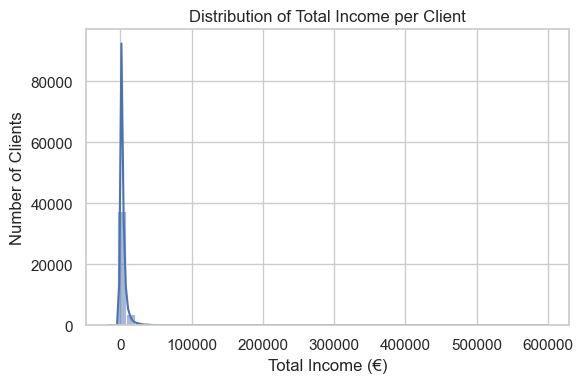

In [37]:
# 1. Distribution of Total Income
plt.figure(figsize=(6, 4))
sns.histplot(client_df['income'], bins=50, kde=True)
plt.title('Distribution of Total Income per Client')
plt.xlabel('Total Income (€)')
plt.ylabel('Number of Clients')
plt.tight_layout()
plt.show()

In [42]:
neg_income = client_df[client_df['income'] < 0]
neg_ticket = client_df[client_df['median_ticket'] < 0]
print(f"Negative income clients: {len(neg_income)}")
print(f"Negative ticket clients: {len(neg_ticket)}")

# Optional: see overlap
neg_both = client_df[(client_df['income'] < 0) & (client_df['median_ticket'] < 0)]

Negative income clients: 55
Negative ticket clients: 55


In [44]:
len(neg_both)

48

In [ ]:
#to drop
#client_df = client_df[(client_df['income'] >= 0) & (client_df['median_ticket'] >= 0)]


In [41]:
client_df['median_ticket'].describe()

count    42149.000000
mean       125.473258
std        236.816560
min      -3131.680000
25%         59.885000
50%         85.365000
75%        132.480000
max      19350.000000
Name: median_ticket, dtype: float64

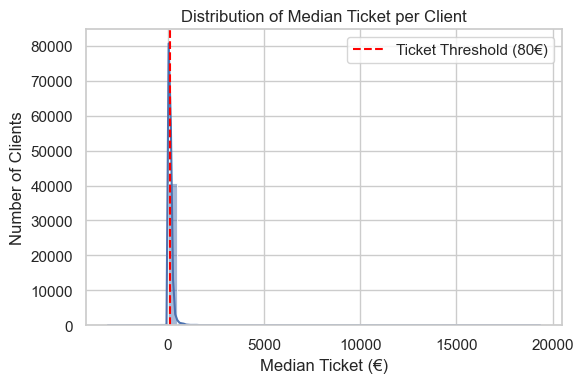

In [40]:
# 2. Distribution of Median Ticket
plt.figure(figsize=(6, 4))
sns.histplot(client_df['median_ticket'], bins=50, kde=True)
plt.axvline(80, color='red', linestyle='--', label='Ticket Threshold (80€)')
plt.title('Distribution of Median Ticket per Client')
plt.xlabel('Median Ticket (€)')
plt.ylabel('Number of Clients')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Efficiency Distribution

In [ ]:
# 3. Efficiency Distribution
plt.figure(figsize=(6, 4))
sns.histplot(client_df['efficiency'], bins=50, kde=True)
plt.title('Distribution of Client Efficiency (Orders / Physical Contacts)')
plt.xlabel('Efficiency')
plt.ylabel('Number of Clients')
plt.tight_layout()
plt.show()

# 4. Orders vs Promotor Contacts (Scatter)

In [ ]:
# 4. Orders vs Promotor Contacts (Scatter)
plt.figure(figsize=(6, 5))
sns.scatterplot(data=client_df, x='prom_contacts_month', y='number_of_orders', hue='channel', alpha=0.6, edgecolor='w')
plt.plot([0, client_df['prom_contacts_month'].max()], [0, client_df['prom_contacts_month'].max()], '--', color='grey', label='Ideal 1:1 Line')
plt.title('Number of Orders vs. Promotor Contacts')
plt.xlabel('Total Promotor Contacts')
plt.ylabel('Total Orders')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Average Efficiency by Channel (Fixed)

In [ ]:
# 5. Average Efficiency by Channel (Fixed)
plt.figure(figsize=(6, 4))
sns.barplot(data=client_df, x='channel', y='efficiency', estimator=np.mean)
plt.title('Average Efficiency by Channel')
plt.xlabel('Channel')
plt.ylabel('Avg Efficiency')
plt.tight_layout()
plt.show()

# 6. Correlation Matrix

In [ ]:
# 6. Correlation Matrix
plt.figure(figsize=(8, 6))
corr = client_df[['income', 'volume', 'number_of_orders', 'prom_contacts_month', 'median_ticket', 'frequency', 'efficiency']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()